<center>
    <h1>Systèmes intelligents et apprentissage machine</h1>
    <h2>ETS GTI770 (Eté 2018)</h2>
    <h2>Travaux Pratiques:  Rapport TP00</h2>
    <h4>Etudiant : ILLY Poulmanogo</h4>
</center>

### Exercice 1 
1.Implémentation la fonction f(x) = x

In [31]:
from numpy import arange
def identite(x):
    return x

2. Afficher la fonction f entre -6 et + 6

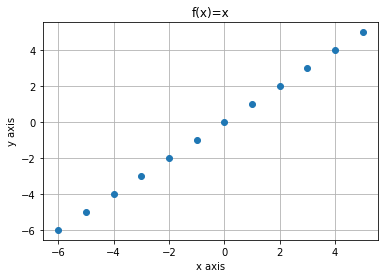

In [32]:
import matplotlib.pyplot as plt
x = arange (-6,6)
y = identite(x)
plt.plot(x,y,'o')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("f(x)=x")
plt.grid(True)
plt.show()

3. Implémentation la fonction sigmoid (https://en.wikipedia.org/wiki/Sigmoid_function)

In [33]:
import numpy as np
def sigmoid(x):
    y = np.exp(x)/(np.exp(x)+1)
    return y

4. Affichage la fonction f entre -6 et + 6

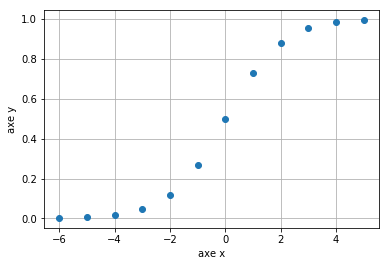

In [34]:
x = arange(-6,6)
y = sigmoid(x)
plt.plot(x,y,'o')
plt.xlabel("axe x")
plt.ylabel("axe y")
plt.grid(True)
plt.show()

### Exercice 2

1. Nous avons téléchargé le dataset fourni depuis Moodle pour ce TP

2. Chargement, en utilisant le fichier GTI770_label_data_set.csv, des 50 premières données de chaque classe. Toutes les images sont chargées dans une matice (X) et les labels dans une matrice (Y). X a la forme (nombre d'image, nombre de canaux(RGB), hauteur, largeur) et Y la forme(nombre d'image, la classe).

In [270]:
import numpy as np
import os
import cv2

#Chargement du fichier CSV contenant le classement des images
csvFile = open("Dataset_GTI770\csv\GTI770_label_data_set.csv", "r")
#Definition de la matrice pour charger les 100 images (50 pour chacun des deux classes (smooth, spiral))
# Toutes les images de dataset sont de format (424, 424,3)
X = np.zeros((100, 424, 424,3))
#Y = np.array((100,10), dtype=object)
Y = np.zeros(100, dtype='object')
nombre_img_smooth = 0
nombre_img_spiral = 0
count = 0
#Parcourir le fichier CSV ligne par ligne
for i in csvFile :
    #Recuperation des valeurs de deux colonnes
    id, classe = i.split(",")
    #Sauter la ligne des attributs (meta-données)
    if id == "id":
        continue
    #Control de la limitation de la taille du dataset
    if "smooth" in classe and nombre_img_smooth < 50 : 
        #Construction du chemin de l'image correspondant l'id
        imagePath = 'Dataset_GTI770\images_training/' + id + '.jpg'
        #Verification de la validité du path de l'image
        if not os.path.exists(imagePath):
            print("Probleme de path du dataset d'images")
            break
        #Récuperation de l'image correspondant l'id
        img = cv2.imread(imagePath)
        #Ranger l'image dans la matrice
        X[count] = img
        Y[count] = classe
        nombre_img_smooth+=1
        count += 1
    if "spiral" in classe and nombre_img_spiral < 50: 
        #Construction du chemin de l'image correspondant l'id
        imagePath = 'Dataset_GTI770\images_training/' + id + '.jpg'
        #Verification de la validité du path de l'image
        if not os.path.exists(imagePath):
            print("Probleme de path du dataset d'images")
            break
        #Récuperation de l'image correspondant l'id
        img = cv2.imread(imagePath)
        #Ranger l'image dans la matrice
        X[count] = img
        Y[count] = classe
        nombre_img_spiral+=1
        count += 1
    if count >= 100 :
        break
print("Chargement du dataset terminé")
print("Nombre d'images : ", count)
print("Nombre d'images smooth : ", nombre_img_smooth)
print("Nombre d'images spiral : ", nombre_img_spiral)

print("Cellule executé avec succès")

Chargement du dataset terminé
Nombre d'images :  100
Nombre d'images smooth :  50
Nombre d'images spiral :  50
Cellule executé avec succès


3. Affichage de manière aléatoire de 10 images de chaque classes.

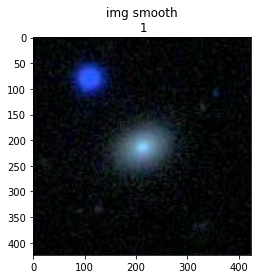

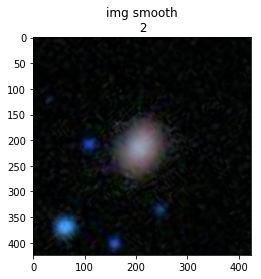

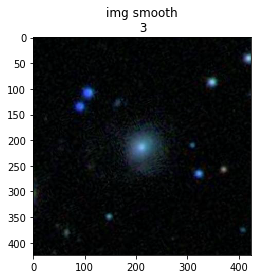

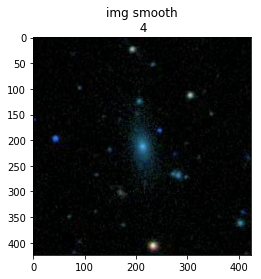

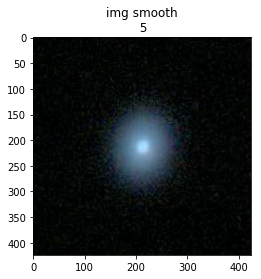

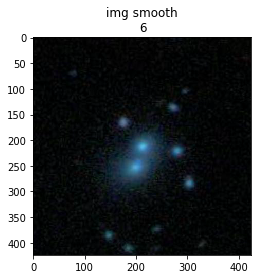

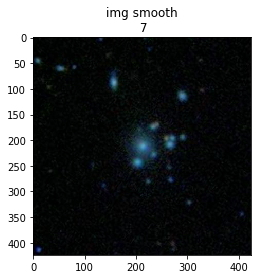

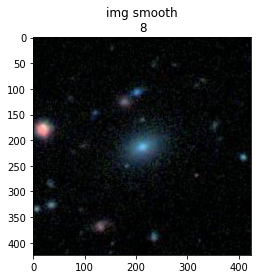

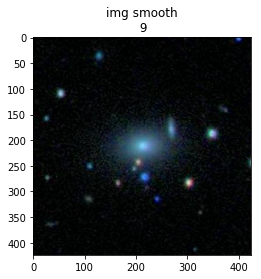

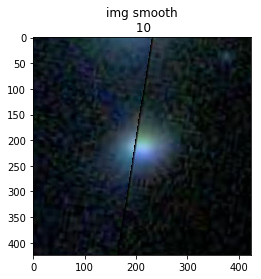

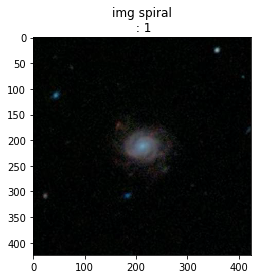

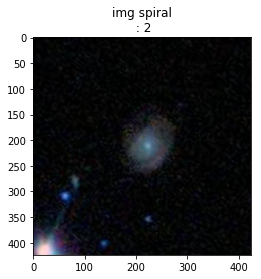

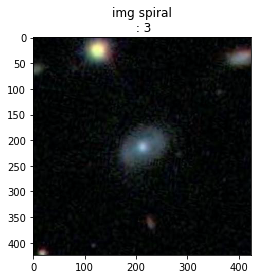

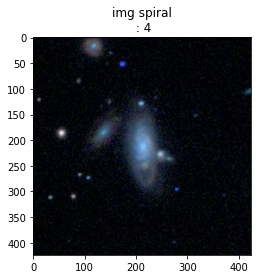

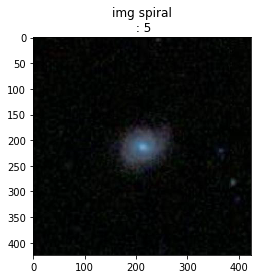

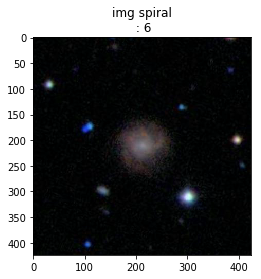

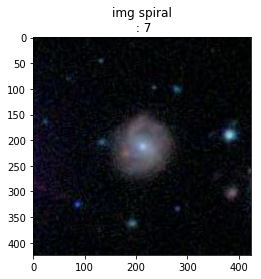

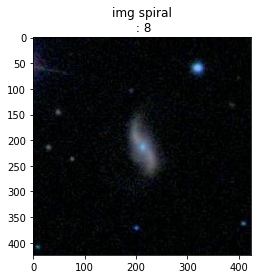

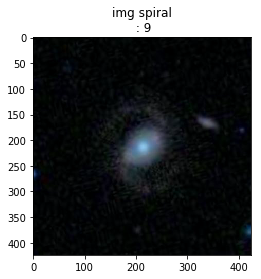

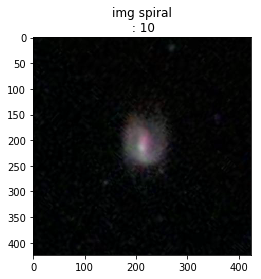

Cellule executé avec succès


In [318]:
import random
# Selection aléatoire des 10 images de chaque classe
j = 0
k = 0
img_smooth_ids = np.zeros(50)
img_spiral_ids = np.zeros(50)
for i in range(100):
    if "smooth" in Y[i] :
        img_smooth_ids[j] = i
        j+=1
    if "spiral" in Y[i] :
        img_spiral_ids[k] = i
        k+=1
img_spiral_sample_ids = random.sample(list(img_spiral_ids),10)
img_smooth_sample_ids = random.sample(list(img_smooth_ids),10)

# Affichage des 10 images sélectionnés de chaque classe
numero = 1
for id in img_smooth_sample_ids :
    id = int (id)
    plt.imshow(X[id]/255)
    plt.title("img "+Y[id]+" "+str(numero))
    numero+=1
    plt.show()
numero = 1
for id in img_spiral_sample_ids :
    id = int (id)
    plt.imshow(X[id]/255)
    plt.title("img "+Y[id]+" : "+str(numero))
    numero+=1
    plt.show()

print("Cellule executé avec succès")

4. Séparation des données de la matrice X en 2 matrices avec un ratio de 70% (X_train) et 30% (X_test), ces 2 matrices doivent avoir le même nombre de classes. Nous faison la même chose pour (Y). Les données ont toujours les mêmes classes.